# Exploratory Data Analysis (EDA) - Credit Risk Model

**Project**: Credit Risk Probability Model for Alternative Data

**Objective**: Explore the Xente transaction dataset to uncover patterns, identify data quality issues, and form hypotheses for feature engineering.

## Table of Contents
1. [Data Loading](#1-data-loading)
2. [Overview of the Data](#2-overview-of-the-data)
3. [Summary Statistics](#3-summary-statistics)
4. [Distribution of Numerical Features](#4-distribution-of-numerical-features)
5. [Distribution of Categorical Features](#5-distribution-of-categorical-features)
6. [Correlation Analysis](#6-correlation-analysis)
7. [Identifying Missing Values](#7-identifying-missing-values)
8. [Outlier Detection](#8-outlier-detection)
9. [Time Series Analysis](#9-time-series-analysis)
10. [Key Insights Summary](#10-key-insights-summary)

## 1. Data Loading

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
from utils import load_data, check_missing_values
from eda import plot_numerical_distribution, plot_categorical_distribution, plot_correlation_matrix
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Load data using utils module
data_path = '../data/raw/data.csv'
df = load_data(data_path)


Data loaded successfully!
Shape: (95662, 16)


## 2. Overview of the Data

Understanding the structure of the dataset including number of rows, columns, and data types.

In [3]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [4]:
# Display last few rows
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0


In [5]:
# Dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  Fraud

In [6]:
# Data types summary
print("\nData Types Summary:")
print(df.dtypes.value_counts())

print("\nColumn Data Types:")
print(df.dtypes)


Data Types Summary:
object     11
int64       4
float64     1
Name: count, dtype: int64

Column Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [7]:
# Unique values count for each column
print("Unique values count:")
unique_counts = pd.DataFrame({
    'Column': df.columns,
    'Unique_Count': [df[col].nunique() for col in df.columns],
    'Data_Type': df.dtypes.values
})
unique_counts

Unique values count:


,Column,Unique_Count,Data_Type
0,TransactionId,95662,object
1,BatchId,94809,object
2,AccountId,3633,object
3,SubscriptionId,3627,object
4,CustomerId,3742,object
5,CurrencyCode,1,object
6,CountryCode,1,int64
7,ProviderId,6,object
8,ProductId,23,object
9,ProductCategory,9,object


## 3. Summary Statistics

Understanding central tendency, dispersion, and shape of the dataset's distribution.

In [8]:
# Summary statistics for numerical features
print("Summary Statistics (Numerical Features):")
df.describe()

Summary Statistics (Numerical Features):


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [9]:
# Summary statistics for categorical features
print("Summary Statistics (Categorical Features):")
df.describe(include=['object'])

Summary Statistics (Categorical Features):


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


In [10]:
# Additional statistics
print("Additional Statistics for Numerical Features:")
numerical_cols = df.select_dtypes(include=[np.number]).columns

stats_df = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Std': df[numerical_cols].std(),
    'Variance': df[numerical_cols].var(),
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurtosis()
})

stats_df

Additional Statistics for Numerical Features:


,Mean,Median,Std,Variance,Skewness,Kurtosis
CountryCode,256.000000,256.0,0.000000,0.000000e+00,0.000000,0.000000
Amount,6717.846433,1000.0,123306.797164,1.520457e+10,51.098490,3363.127739
Value,9900.583941,1000.0,123122.087776,1.515905e+10,51.291086,3378.069274
PricingStrategy,2.255974,2.0,0.732924,5.371778e-01,1.659057,2.087534
FraudResult,0.002018,0.0,0.044872,2.013471e-03,22.196295,490.685762


## 4. Distribution of Numerical Features

Visualizing the distribution of numerical features to identify patterns, skewness, and potential outliers.

In [11]:
# Parse TransactionStartTime as datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

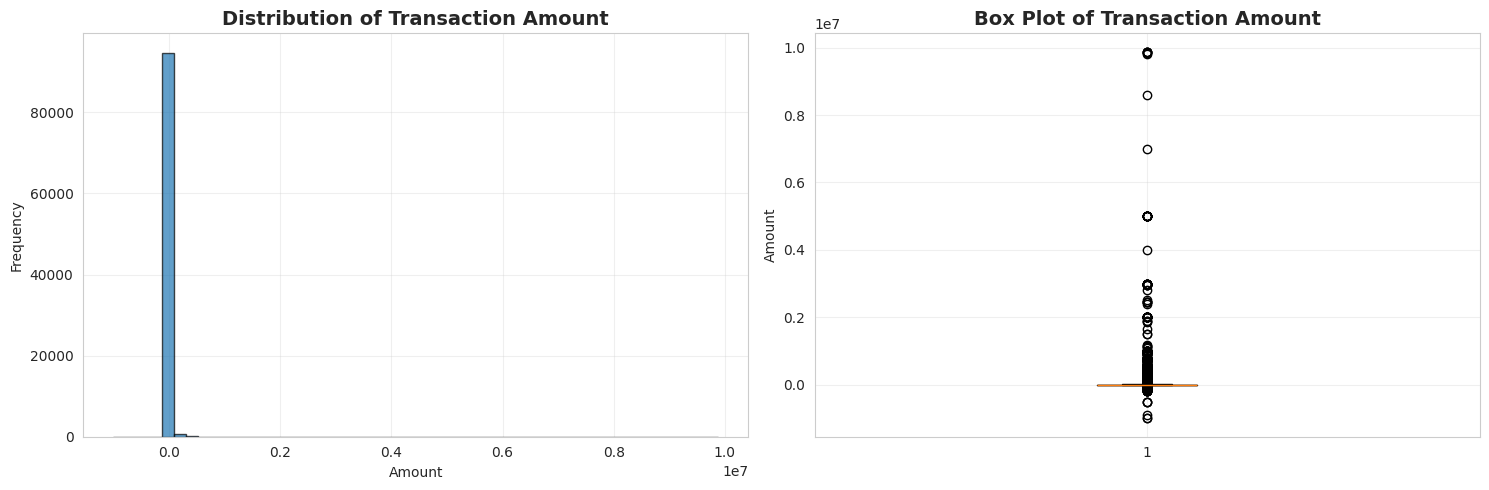

Amount - Mean: 6717.85, Median: 1000.00
Amount - Min: -1000000.00, Max: 9880000.00


In [12]:
# Distribution of Amount
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['Amount'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Transaction Amount', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['Amount'], vert=True)
axes[1].set_title('Box Plot of Transaction Amount', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Amount')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Amount - Mean: {df['Amount'].mean():.2f}, Median: {df['Amount'].median():.2f}")
print(f"Amount - Min: {df['Amount'].min():.2f}, Max: {df['Amount'].max():.2f}")

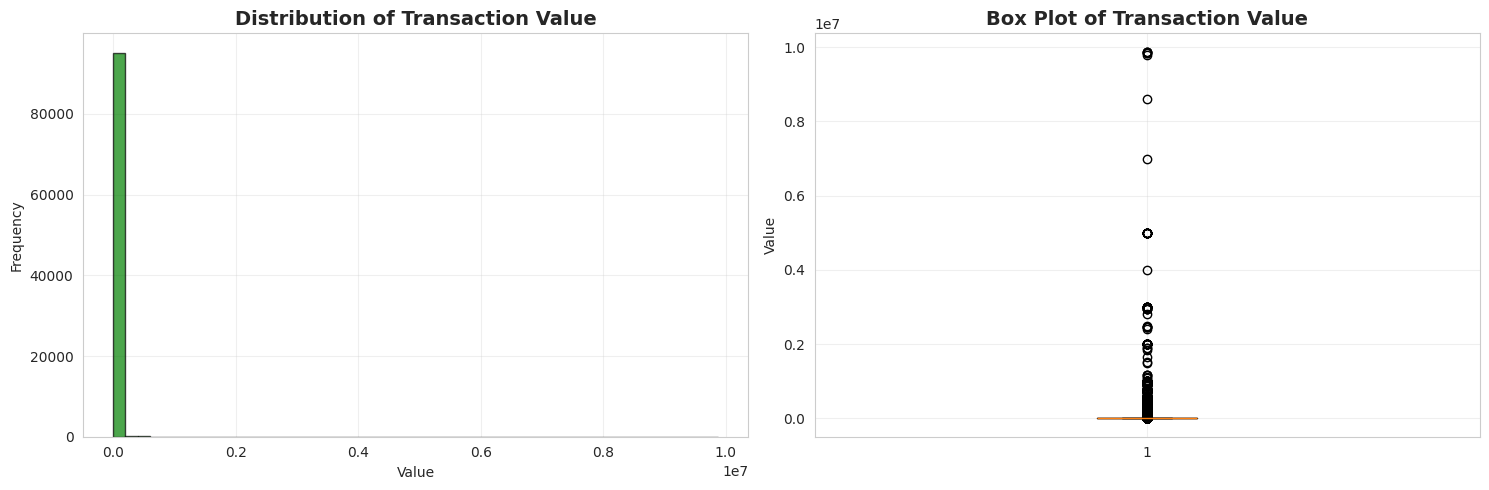

Value - Mean: 9900.58, Median: 1000.00
Value - Min: 2.00, Max: 9880000.00


In [13]:
# Distribution of Value
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['Value'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].set_title('Distribution of Transaction Value', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['Value'], vert=True)
axes[1].set_title('Box Plot of Transaction Value', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Value - Mean: {df['Value'].mean():.2f}, Median: {df['Value'].median():.2f}")
print(f"Value - Min: {df['Value'].min():.2f}, Max: {df['Value'].max():.2f}")

In [14]:
# Check for negative amounts (credits vs debits)
print("Transaction Type Distribution:")
print(f"Positive Amounts (Debits): {(df['Amount'] > 0).sum()} ({(df['Amount'] > 0).sum() / len(df) * 100:.2f}%)")
print(f"Negative Amounts (Credits): {(df['Amount'] < 0).sum()} ({(df['Amount'] < 0).sum() / len(df) * 100:.2f}%)")
print(f"Zero Amounts: {(df['Amount'] == 0).sum()}")

Transaction Type Distribution:
Positive Amounts (Debits): 57473 (60.08%)
Negative Amounts (Credits): 38189 (39.92%)
Zero Amounts: 0


## 5. Distribution of Categorical Features

Analyzing the distribution of categorical features to understand frequency and variability.

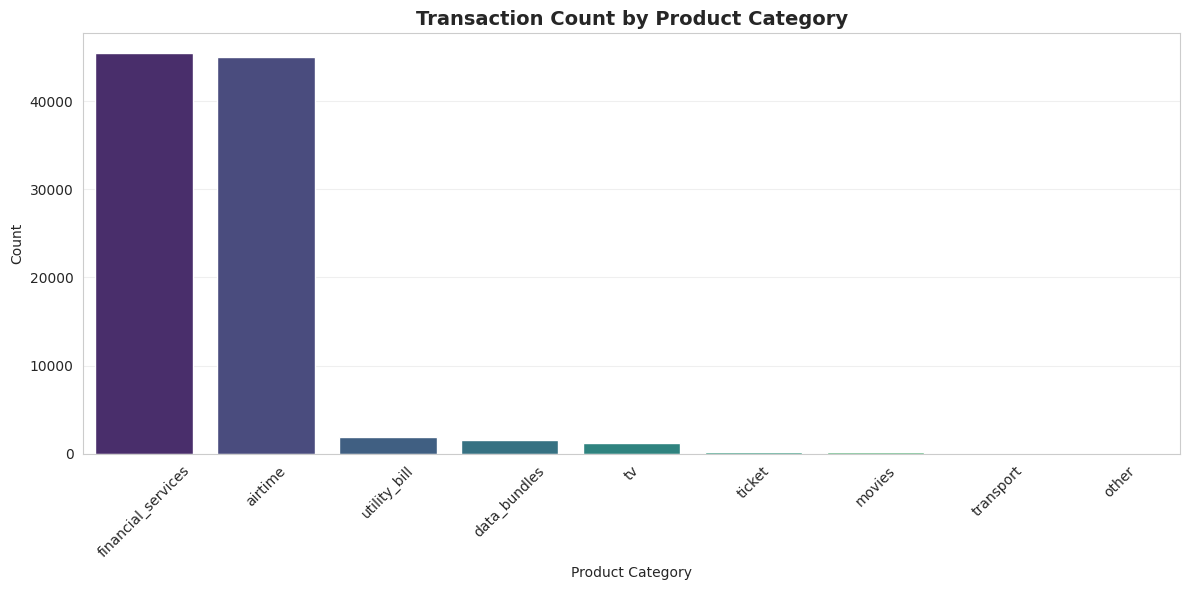


Product Category Distribution:
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64

Total unique product categories: 9


In [15]:
# Product Category Distribution
plt.figure(figsize=(12, 6))
product_counts = df['ProductCategory'].value_counts()
sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')
plt.title('Transaction Count by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nProduct Category Distribution:")
print(product_counts)
print(f"\nTotal unique product categories: {df['ProductCategory'].nunique()}")

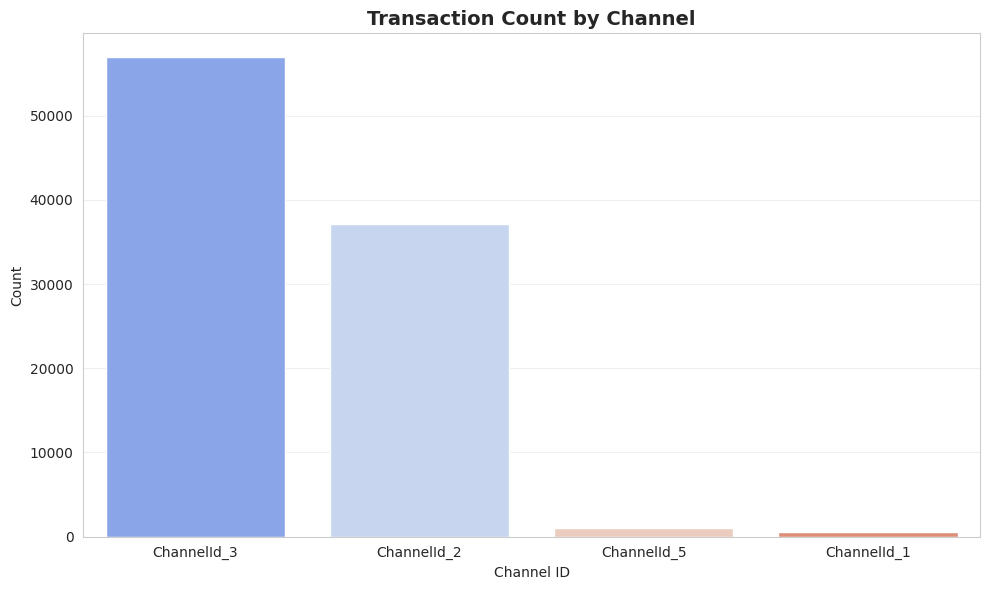


Channel Distribution:
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


In [16]:
# Channel Distribution
plt.figure(figsize=(10, 6))
channel_counts = df['ChannelId'].value_counts()
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='coolwarm')
plt.title('Transaction Count by Channel', fontsize=14, fontweight='bold')
plt.xlabel('Channel ID')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nChannel Distribution:")
print(channel_counts)

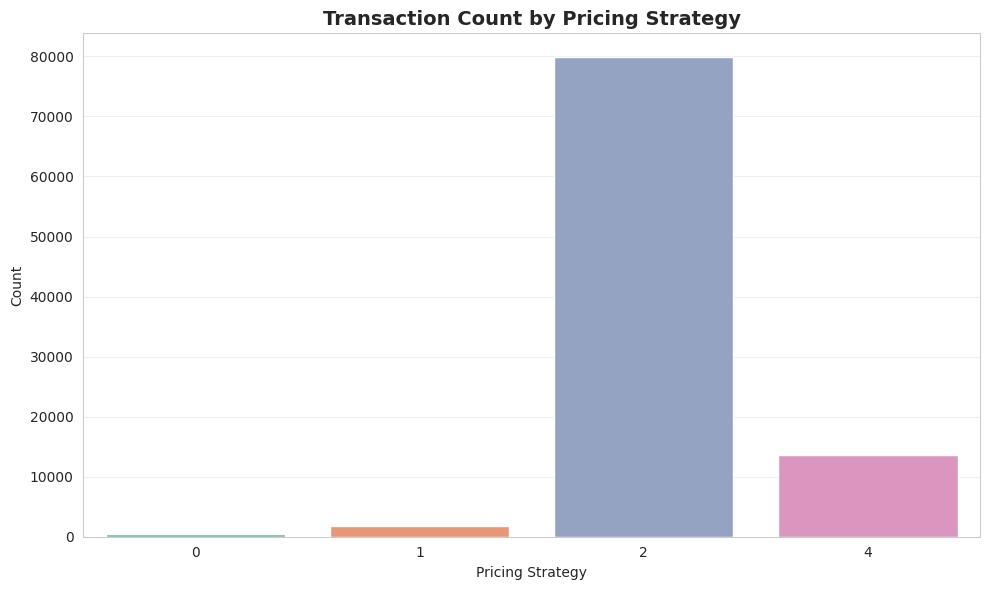


Pricing Strategy Distribution:
PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64


In [17]:
# Pricing Strategy Distribution
plt.figure(figsize=(10, 6))
pricing_counts = df['PricingStrategy'].value_counts()
sns.barplot(x=pricing_counts.index, y=pricing_counts.values, palette='Set2')
plt.title('Transaction Count by Pricing Strategy', fontsize=14, fontweight='bold')
plt.xlabel('Pricing Strategy')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nPricing Strategy Distribution:")
print(pricing_counts)

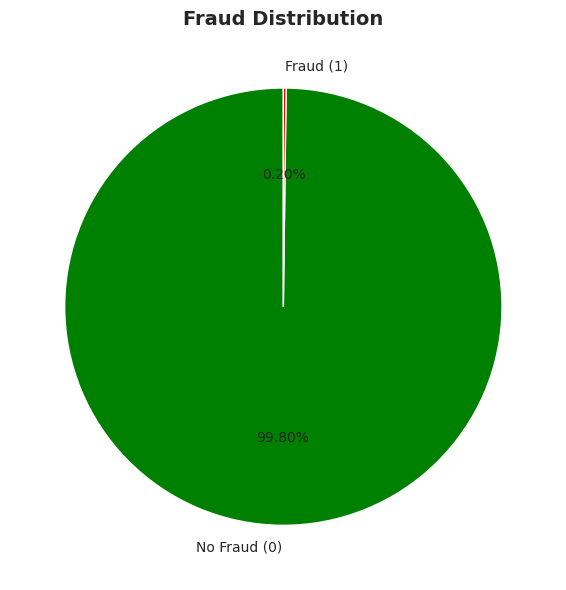


Fraud Result Distribution:
FraudResult
0    95469
1      193
Name: count, dtype: int64
Fraud Rate: 0.2018%


In [18]:
# Fraud Result Distribution
plt.figure(figsize=(8, 6))
fraud_counts = df['FraudResult'].value_counts()
colors = ['green', 'red']
plt.pie(fraud_counts.values, labels=['No Fraud (0)', 'Fraud (1)'], autopct='%1.2f%%', 
        colors=colors, startangle=90)
plt.title('Fraud Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nFraud Result Distribution:")
print(fraud_counts)
print(f"Fraud Rate: {(df['FraudResult'] == 1).sum() / len(df) * 100:.4f}%")

In [19]:
# Currency & Country Code Distribution
print("Currency Code Distribution:")
print(df['CurrencyCode'].value_counts())
print("\nCountry Code Distribution:")
print(df['CountryCode'].value_counts())

Currency Code Distribution:
CurrencyCode
UGX    95662
Name: count, dtype: int64

Country Code Distribution:
CountryCode
256    95662
Name: count, dtype: int64


In [20]:
# Customer metrics
print(f"Total number of unique customers: {df['CustomerId'].nunique():,}")
print(f"Total number of transactions: {len(df):,}")
print(f"Average transactions per customer: {len(df) / df['CustomerId'].nunique():.2f}")

Total number of unique customers: 3,742
Total number of transactions: 95,662
Average transactions per customer: 25.56


## 6. Correlation Analysis

Understanding the relationship between numerical features.

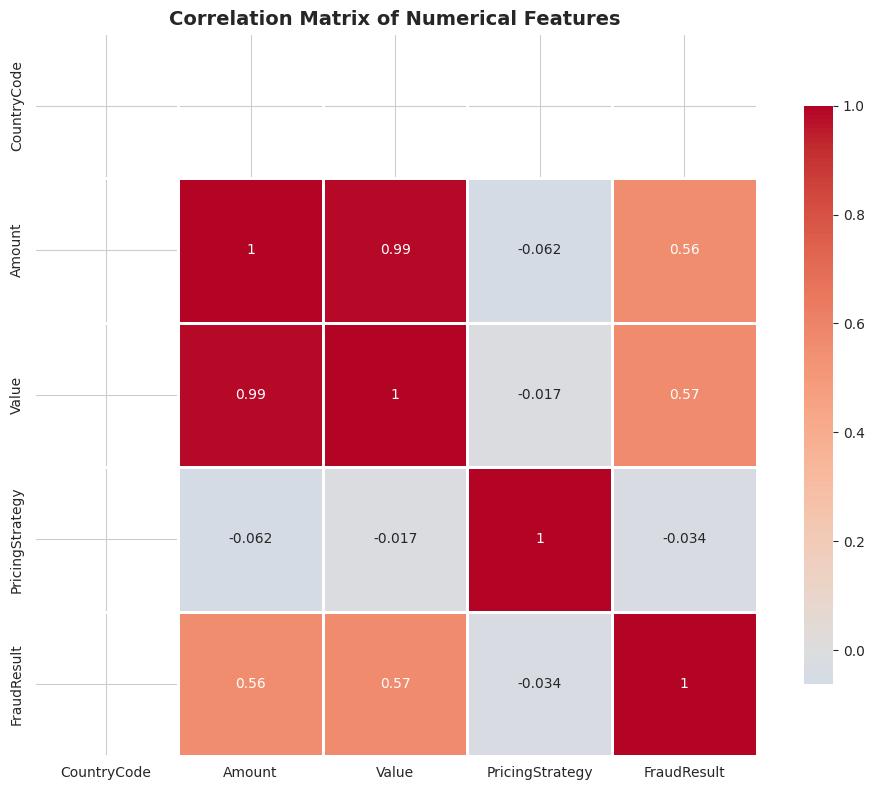


Correlation Matrix:
                 CountryCode    Amount     Value  PricingStrategy  FraudResult
CountryCode              NaN       NaN       NaN              NaN          NaN
Amount                   NaN  1.000000  0.989692        -0.061931     0.557370
Value                    NaN  0.989692  1.000000        -0.017020     0.566739
PricingStrategy          NaN -0.061931 -0.017020         1.000000    -0.033821
FraudResult              NaN  0.557370  0.566739        -0.033821     1.000000


In [21]:
# Select numerical columns for correlation
numerical_cols = ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']
correlation_matrix = df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

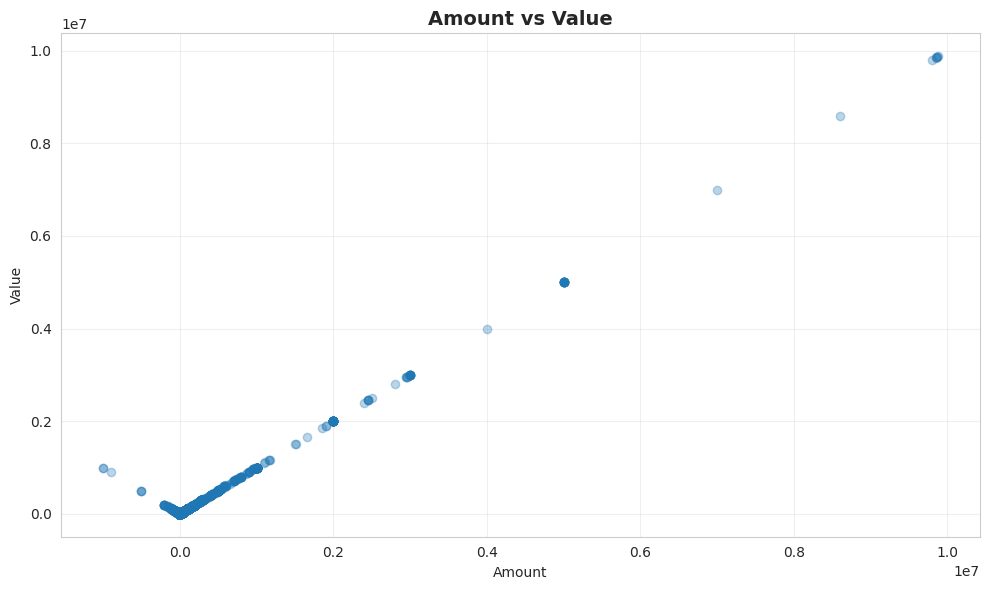

In [22]:
# Scatter plot: Amount vs Value
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Value'], alpha=0.3)
plt.title('Amount vs Value', fontsize=14, fontweight='bold')
plt.xlabel('Amount')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Identifying Missing Values

Identifying missing values to determine appropriate imputation strategies.

### Missing Value Handling Strategy

**Observation:**
The dataset was checked for missing values using `df.isnull().sum()`. The result showed that there are **no missing values** in any of the columns (95662 non-null entries for all 16 columns).

**Strategy:**
Since the dataset is complete, no imputation (mean/median/mode) or row dropping is required.

**Justification:**
- **Credit Risk Modeling:** In credit risk modeling, missing values can be informative (e.g., missing employment history might indicate unemployment). However, since our data is complete, we can proceed without bias introduced by imputation methods.
- **Bias/Information Loss:** By not having to drop rows or impute values, we preserve the integrity of the original dataset and avoid introducing synthetic variance or reducing the sample size.

In [ ]:
# Check missing values using utils module
missing_stats = check_missing_values(df)


In [23]:
# Missing values count
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
print(missing_df)

print(f"\nTotal missing values: {missing_values.sum()}")

Missing Values Summary:
                  Column  Missing_Count  Missing_Percentage
0          TransactionId              0                 0.0
1                BatchId              0                 0.0
2              AccountId              0                 0.0
3         SubscriptionId              0                 0.0
4             CustomerId              0                 0.0
5           CurrencyCode              0                 0.0
6            CountryCode              0                 0.0
7             ProviderId              0                 0.0
8              ProductId              0                 0.0
9        ProductCategory              0                 0.0
10             ChannelId              0                 0.0
11                Amount              0                 0.0
12                 Value              0                 0.0
13  TransactionStartTime              0                 0.0
14       PricingStrategy              0                 0.0
15           Fra

In [24]:
# Visualize missing values
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_df_filtered = missing_df[missing_df['Missing_Count'] > 0]
    sns.barplot(x='Column', y='Missing_Percentage', data=missing_df_filtered, palette='Reds_r')
    plt.title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
    plt.xlabel('Column')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

No missing values found in the dataset!


## 8. Outlier Detection

Using box plots and statistical methods to identify outliers.

In [25]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Detect outliers for Value
outliers_value, lower_val, upper_val = detect_outliers_iqr(df, 'Value')
print(f"Value - Outliers detected: {len(outliers_value)} ({len(outliers_value)/len(df)*100:.2f}%)")
print(f"Value - Lower bound: {lower_val:.2f}, Upper bound: {upper_val:.2f}")

# Detect outliers for Amount
outliers_amount, lower_amt, upper_amt = detect_outliers_iqr(df, 'Amount')
print(f"\nAmount - Outliers detected: {len(outliers_amount)} ({len(outliers_amount)/len(df)*100:.2f}%)")
print(f"Amount - Lower bound: {lower_amt:.2f}, Upper bound: {upper_amt:.2f}")

Value - Outliers detected: 9021 (9.43%)
Value - Lower bound: -6812.50, Upper bound: 12087.50

Amount - Outliers detected: 24441 (25.55%)
Amount - Lower bound: -4325.00, Upper bound: 7075.00


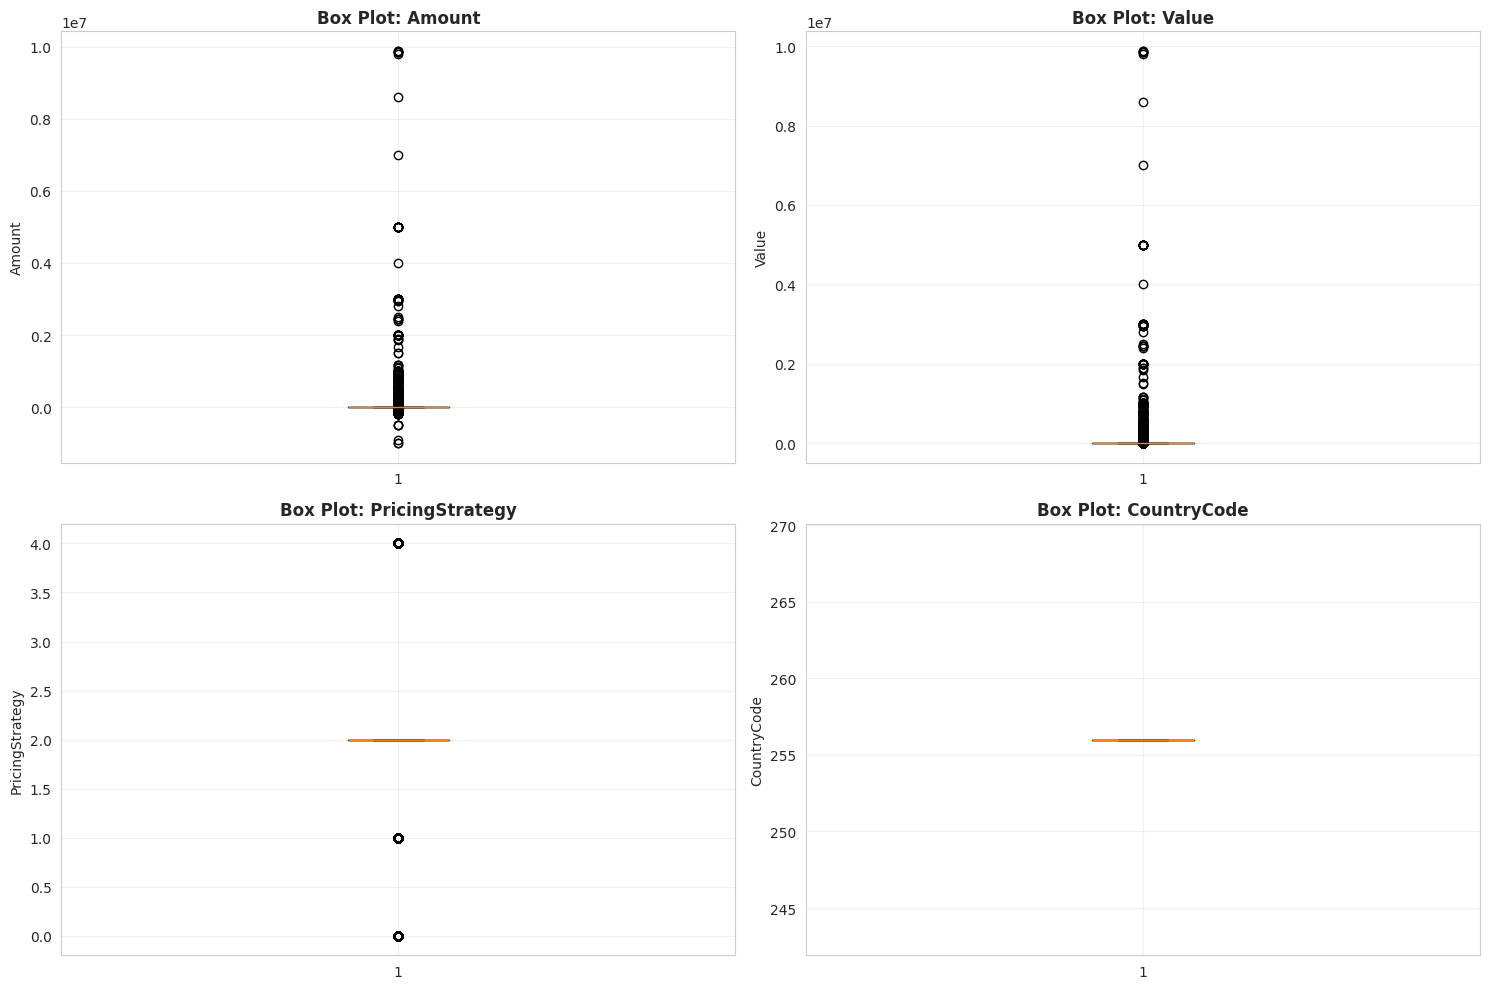

In [26]:
# Box plots for all numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Amount
axes[0, 0].boxplot(df['Amount'])
axes[0, 0].set_title('Box Plot: Amount', fontweight='bold')
axes[0, 0].set_ylabel('Amount')
axes[0, 0].grid(True, alpha=0.3)

# Value
axes[0, 1].boxplot(df['Value'])
axes[0, 1].set_title('Box Plot: Value', fontweight='bold')
axes[0, 1].set_ylabel('Value')
axes[0, 1].grid(True, alpha=0.3)

# PricingStrategy
axes[1, 0].boxplot(df['PricingStrategy'])
axes[1, 0].set_title('Box Plot: PricingStrategy', fontweight='bold')
axes[1, 0].set_ylabel('PricingStrategy')
axes[1, 0].grid(True, alpha=0.3)

# CountryCode
axes[1, 1].boxplot(df['CountryCode'])
axes[1, 1].set_title('Box Plot: CountryCode', fontweight='bold')
axes[1, 1].set_ylabel('CountryCode')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Time Series Analysis

Analyzing transaction patterns over time.

In [27]:
# Extract time features
df['TransactionDate'] = df['TransactionStartTime'].dt.date
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionYear'] = df['TransactionStartTime'].dt.year
df['TransactionDayOfWeek'] = df['TransactionStartTime'].dt.dayofweek

print("Time features extracted successfully!")
print(f"\nDate range: {df['TransactionStartTime'].min()} to {df['TransactionStartTime'].max()}")

Time features extracted successfully!

Date range: 2018-11-15 02:18:49+00:00 to 2019-02-13 10:01:28+00:00


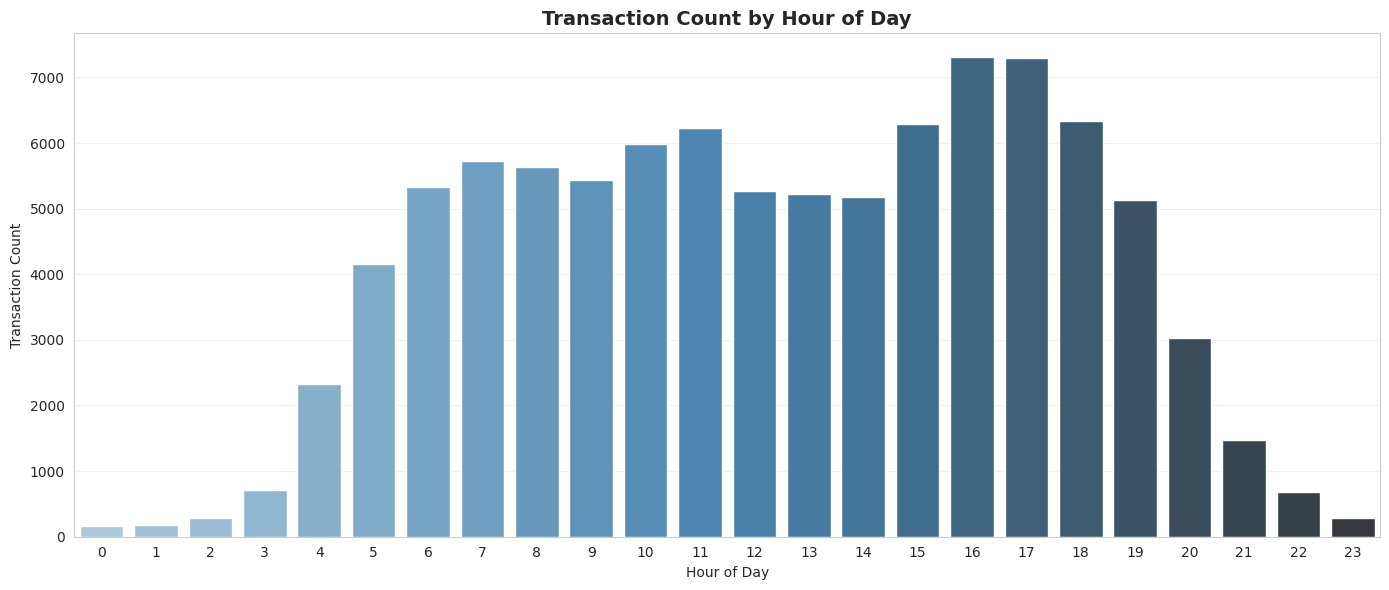

In [28]:
# Transactions by hour
plt.figure(figsize=(14, 6))
hourly_transactions = df.groupby('TransactionHour').size()
sns.barplot(x=hourly_transactions.index, y=hourly_transactions.values, palette='Blues_d')
plt.title('Transaction Count by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

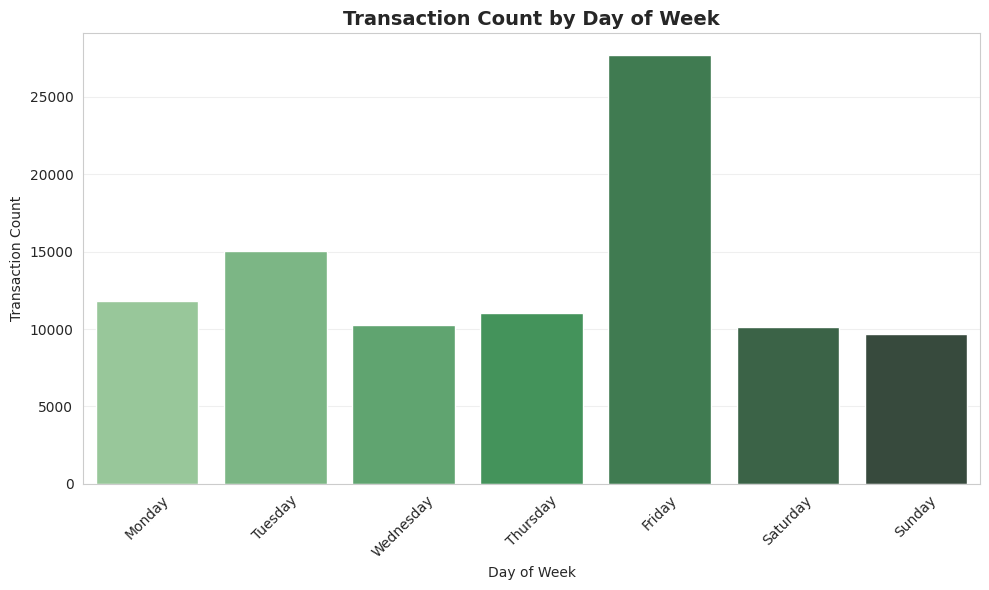

In [29]:
# Transactions by day of week
plt.figure(figsize=(10, 6))
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_transactions = df.groupby('TransactionDayOfWeek').size()
sns.barplot(x=[day_names[i] for i in dow_transactions.index], y=dow_transactions.values, palette='Greens_d')
plt.title('Transaction Count by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

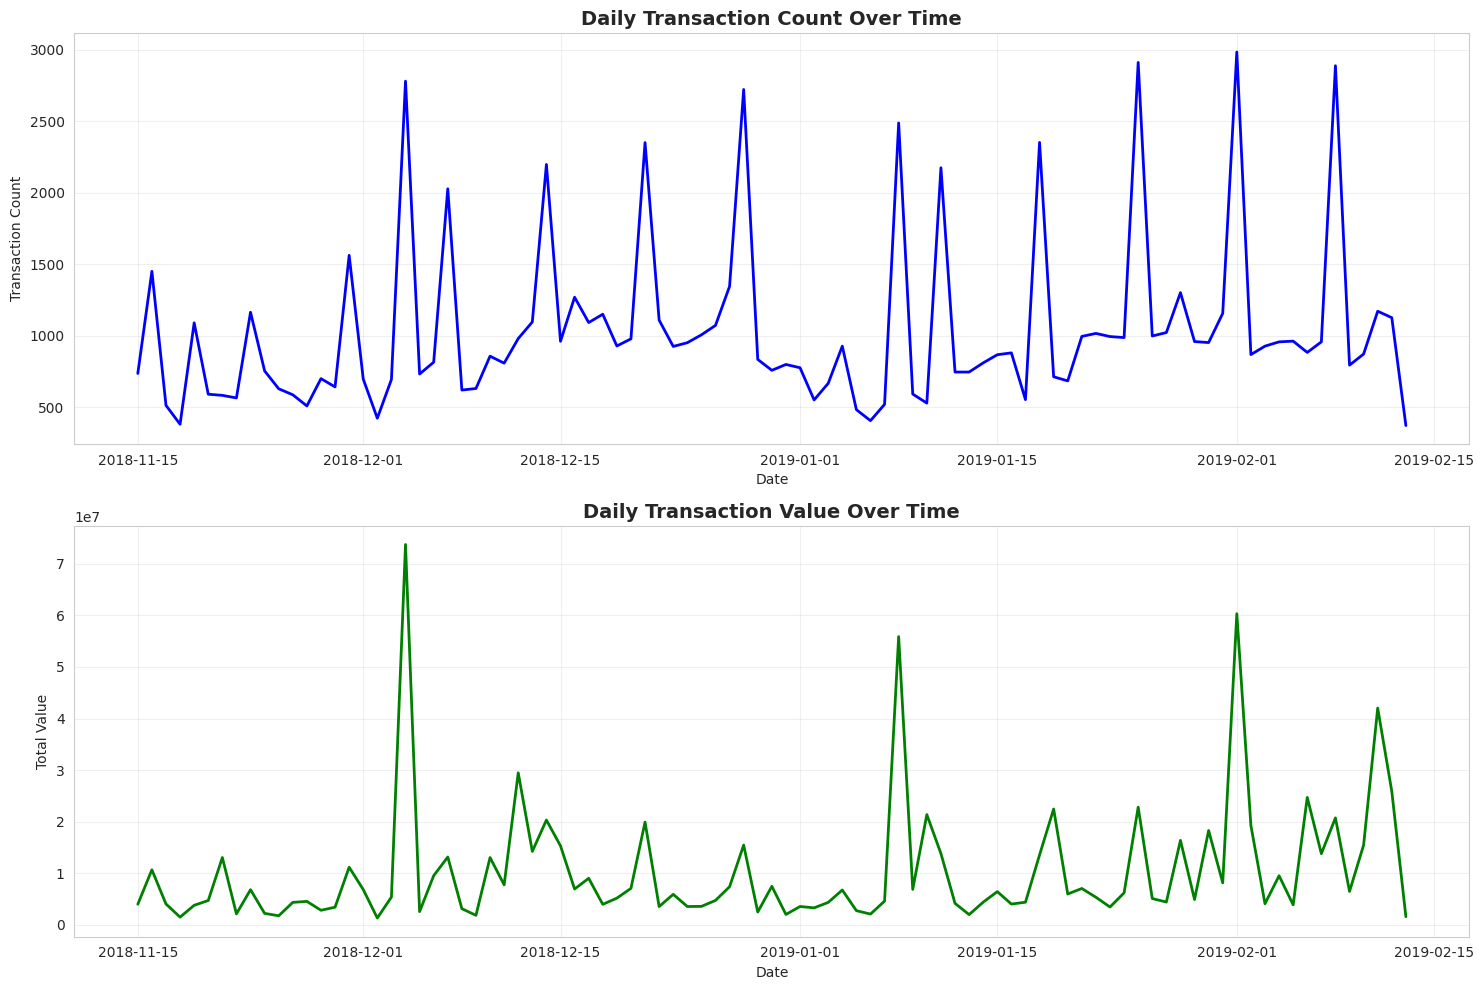

In [30]:
# Daily transactions trend
daily_transactions = df.groupby('TransactionDate').agg({
    'TransactionId': 'count',
    'Value': 'sum'
}).rename(columns={'TransactionId': 'Count', 'Value': 'Total_Value'})

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Transaction count trend
axes[0].plot(daily_transactions.index, daily_transactions['Count'], color='blue', linewidth=2)
axes[0].set_title('Daily Transaction Count Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Transaction Count')
axes[0].grid(True, alpha=0.3)

# Total value trend
axes[1].plot(daily_transactions.index, daily_transactions['Total_Value'], color='green', linewidth=2)
axes[1].set_title('Daily Transaction Value Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Value')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Key Insights Summary

**Top 3-5 Most Important Insights:**

In [31]:
# Calculate key metrics for insights

# 1. Customer engagement metrics
customer_transactions = df.groupby('CustomerId').agg({
    'TransactionId': 'count',
    'Value': ['sum', 'mean'],
    'TransactionStartTime': ['min', 'max']
})

customer_transactions.columns = ['Transaction_Count', 'Total_Value', 'Avg_Value', 'First_Transaction', 'Last_Transaction']
customer_transactions['Recency_Days'] = (customer_transactions['Last_Transaction'].max() - customer_transactions['Last_Transaction']).dt.days

print("Customer Engagement Summary:")
print(f"Average transactions per customer: {customer_transactions['Transaction_Count'].mean():.2f}")
print(f"Median transactions per customer: {customer_transactions['Transaction_Count'].median():.0f}")
print(f"Max transactions by single customer: {customer_transactions['Transaction_Count'].max()}")

# 2. Product category insights
category_metrics = df.groupby('ProductCategory').agg({
    'TransactionId': 'count',
    'Value': ['sum', 'mean']
})
category_metrics.columns = ['Count', 'Total_Value', 'Avg_Value']
category_metrics = category_metrics.sort_values('Count', ascending=False)

print("\nTop 3 Product Categories by Transaction Count:")
print(category_metrics.head(3))

# 3. Fraud analysis
fraud_rate = (df['FraudResult'] == 1).sum() / len(df) * 100
print(f"\nFraud rate: {fraud_rate:.4f}%")

if fraud_rate > 0:
    fraud_by_category = df.groupby('ProductCategory')['FraudResult'].mean() * 100
    print("\nFraud Rate by Product Category:")
    print(fraud_by_category.sort_values(ascending=False).head())

# 4. Transaction timing patterns
peak_hour = df['TransactionHour'].value_counts().idxmax()
print(f"\nPeak transaction hour: {peak_hour}:00")

# 5. Value distribution
print(f"\nTransaction Value Statistics:")
print(f"Mean: {df['Value'].mean():.2f}")
print(f"Median: {df['Value'].median():.2f}")
print(f"Skewness: {df['Value'].skew():.2f}")

Customer Engagement Summary:
Average transactions per customer: 25.56
Median transactions per customer: 7
Max transactions by single customer: 4091

Top 3 Product Categories by Transaction Count:
                    Count  Total_Value     Avg_Value
ProductCategory                                     
financial_services  45405    578208500  12734.467570
airtime             45027    272404327   6049.799609
utility_bill         1920     40217649  20946.692188

Fraud rate: 0.2018%

Fraud Rate by Product Category:
ProductCategory
transport             8.000000
utility_bill          0.625000
financial_services    0.354586
airtime               0.039976
data_bundles          0.000000
Name: FraudResult, dtype: float64

Peak transaction hour: 16:00

Transaction Value Statistics:
Mean: 9900.58
Median: 1000.00
Skewness: 51.29


### Summary of Key Insights

1. **Customer Engagement Variability**: 
   - Average transactions per customer is 25.56, but the median is only 7, indicating a highly skewed distribution
   - Maximum transactions by a single customer reached 4,091, showing extreme variability in customer engagement
   - This wide gap between mean and median suggests a small subset of highly active customers drive most transactions
   - **Implications for RFM-based risk proxy**: The high variability means RFM segmentation will be critical - customers with low frequency may not necessarily be high risk, and vice versa

2. **Product Category Concentration**: 
   - Financial services (45,405 transactions, ~₹578M total value) and airtime (45,027 transactions, ~₹272M total value) dominate transaction volume, accounting for the vast majority of activity
   - Utility bills represent only 1,920 transactions but have the highest average transaction value (₹20,947)
   - **Impact on feature engineering**: Product category should be a key feature, with particular attention to the high-value utility bill category and the high-volume financial services/airtime categories

3. **Transaction Timing Patterns**: 
   - Peak transaction hour is 16:00 (4 PM), suggesting customers transact most during late afternoon
   - This temporal pattern may indicate end-of-workday behavior or specific business cycles
   - **Potential feature for credit risk prediction**: Time-based features (hour of day, day of week) could help identify unusual transaction patterns that correlate with risk

4. **Fraud Indicators**: 
   - Overall fraud rate is very low at 0.20% (approximately 1 in 500 transactions)
   - Transport category shows highest fraud rate at 8.0%, followed by utility bills at 0.625%
   - Financial services has 0.35% fraud rate despite high volume; airtime has very low 0.04% fraud rate
   - Data bundles show 0% fraud in this dataset
   - **Relationship to credit risk**: High fraud rates in transport and utility bills suggest these categories may correlate with higher credit risk and warrant additional scrutiny in the model

5. **Value Distribution Characteristics**: 
   - Extremely high skewness (51.29) indicates a heavily right-tailed distribution with significant outliers
   - Mean transaction value (₹9,901) is nearly 10x the median (₹1,000), confirming the presence of high-value outliers
   - **Implications for modeling approach**: 
     - Log transformation or robust scaling will be essential for handling skewness
     - Consider separate models or stratification for different value ranges
     - Outlier detection and treatment will be critical before model training
     - May need to cap extreme values or use quantile-based features to prevent model distortion

---

## Conclusion

This EDA has provided comprehensive insights into the Xente transaction dataset. The findings will guide:
- Feature engineering strategies for Task 3
- RFM metric calculation for Task 4
- Model selection and validation approaches for Task 5

Next steps:
1. Implement feature engineering pipeline
2. Calculate RFM metrics and create proxy target variable
3. Train and evaluate credit risk models